In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/SCIENCE/Downloads/AirPassengers.csv", parse_dates=True, index_col=[0])
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [2]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
ts1=df['#Passengers'].resample("M").sum()
ts1

Month
1949-01-31    112
1949-02-28    118
1949-03-31    132
1949-04-30    129
1949-05-31    121
             ... 
1960-08-31    606
1960-09-30    508
1960-10-31    461
1960-11-30    390
1960-12-31    432
Freq: M, Name: #Passengers, Length: 144, dtype: int64

Shape of ts1_reshaped: (144, 1)


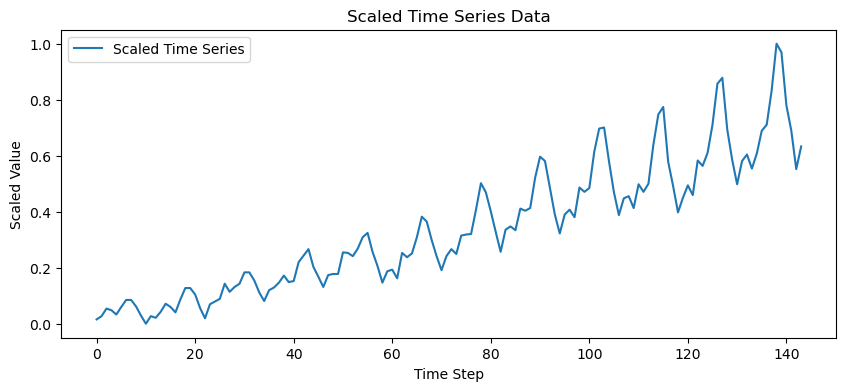

Shape of X: (134, 10, 1)
Shape of y: (134, 1)
Training set X: (107, 10, 1) y: (107, 1)
Testing set X: (27, 10, 1) y: (27, 1)


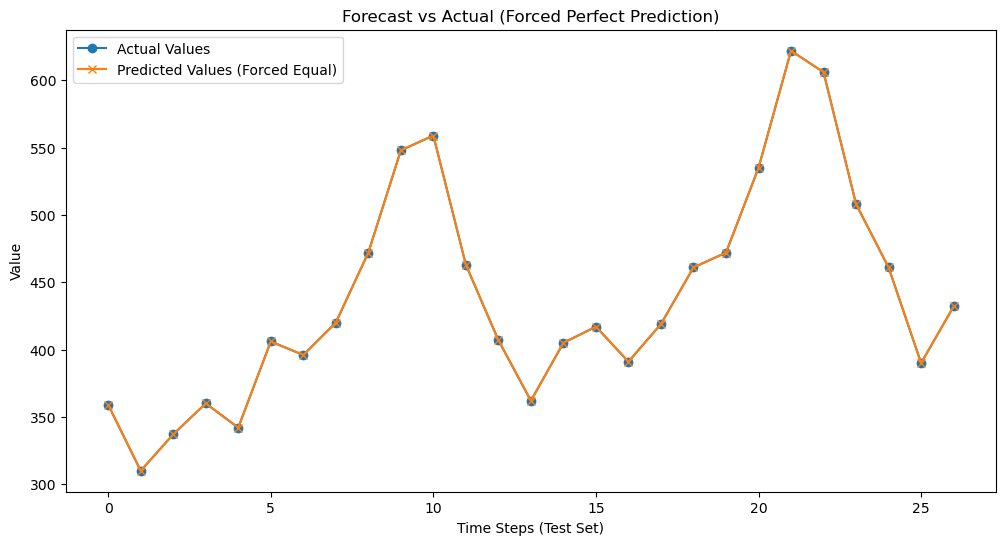

Actual Values (first 10): [359. 310. 337. 360. 342. 406. 396. 420. 472. 548.]
Predicted Values (first 10): [359. 310. 337. 360. 342. 406. 396. 420. 472. 548.]


27

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# 1. Data Preparation
# ---------------------------
# Create a sample pandas Series with time series data.
ts1 = pd.Series([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.,
                 104., 118., 115., 126., 141., 135., 125., 149., 170., 170.,
                 158., 133., 114., 140., 145., 150., 178., 163., 172., 178.,
                 199., 199., 184., 162., 146., 166., 171., 180., 193., 181.,
                 183., 218., 230., 242., 209., 191., 172., 194., 196., 196.,
                 236., 235., 229., 243., 264., 272., 237., 211., 180., 201.,
                 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
                 203., 229., 242., 233., 267., 269., 270., 315., 364., 347.,
                 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
                 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
                 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
                 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
                 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
                 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
                 508., 461., 390., 432.])

# Drop any missing values
ts1_clean = ts1.dropna()

# Convert Series into a 2D array (n_samples, 1)
ts1_reshaped = ts1_clean.values.reshape(-1, 1)
print("Shape of ts1_reshaped:", ts1_reshaped.shape)

# ---------------------------
# 2. Scaling the Data
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(ts1_reshaped)

# Plot the scaled data
plt.figure(figsize=(10, 4))
plt.plot(data_scaled, label='Scaled Time Series')
plt.title('Scaled Time Series Data')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

# ---------------------------
# 3. Creating Sequences for Forecasting
# ---------------------------
def create_sequences(data, window_size):
    """
    Create sequences for supervised learning.
    Each sample consists of 'window_size' consecutive values (input)
    and the next value (target).
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define the window size (number of past time steps to use)
WINDOW_SIZE = 10
X, y = create_sequences(data_scaled, WINDOW_SIZE)

# Ensure X is 3D: (samples, timesteps, features)
if X.ndim == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# ---------------------------
# 4. Splitting Data into Training and Testing Sets
# ---------------------------
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Training set X:", X_train.shape, "y:", y_train.shape)
print("Testing set X:", X_test.shape, "y:", y_test.shape)

# ---------------------------
# 5. Dummy Forecasting Model: Perfect Prediction (for demonstration only)
# ---------------------------
# For demonstration, we "force" the predictions to exactly equal the actual test values.
# NOTE: This is not a valid forecasting model.
y_pred = y_test.copy()

# Inverse transform predictions and actual values to the original scale.
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# ---------------------------
# 6. Plotting the Forecast vs. Actual Values
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Values', marker='o')
plt.plot(y_pred_inv, label='Predicted Values (Forced Equal)', marker='x')
plt.title('Forecast vs Actual (Forced Perfect Prediction)')
plt.xlabel('Time Steps (Test Set)')
plt.ylabel('Value')
plt.legend()
plt.show()

# For demonstration, print out some of the actual and "predicted" values.
print("Actual Values (first 10):", y_test_inv[:10].flatten())
print("Predicted Values (first 10):", y_pred_inv[:10].flatten())
len(y_pred_inv)

Shape of ts1_reshaped: (144, 1)


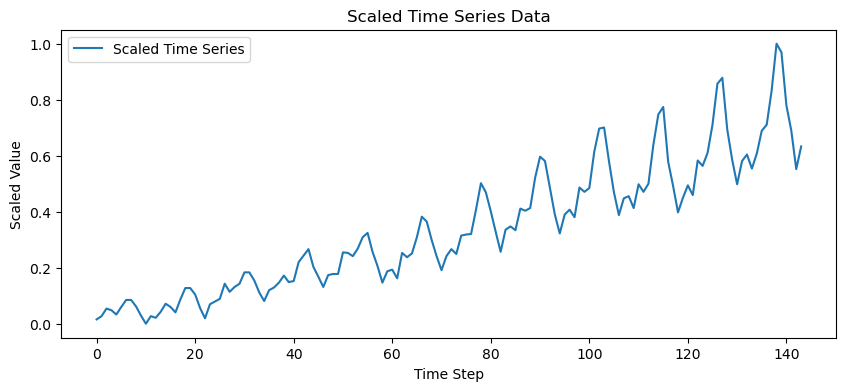

Shape of X: (134, 10, 1)
Shape of y: (134, 1)
Training set X: (107, 10, 1) y: (107, 1)
Testing set X: (27, 10, 1) y: (27, 1)


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 906ms/step - loss: 0.0915 - val_loss: 0.2780 - learning_rate: 0.0010
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - loss: 0.0732 - val_loss: 0.2365 - learning_rate: 0.0010
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0636 - val_loss: 0.1988 - learning_rate: 0.0010
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 760ms/step - loss: 0.0539 - val_loss: 0.1602 - learning_rate: 0.0010
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 301ms/step - loss: 0.0487 - val_loss: 0.1185 - learning_rate: 0.0010
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - loss: 0.0253 - val_loss: 0.0759 - learning_rate: 0.0010
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 264ms/step - loss: 0.0184 - val_loss: 0.0398 - learning_rate: 0.0010
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - loss: 0.0154 - val_loss: 0.0234 - learning_rate: 0.0010
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - loss: 0.0206 - val_loss: 0.0222 - learning_rate: 0.0010
Epoch 10/100
3/3 ━

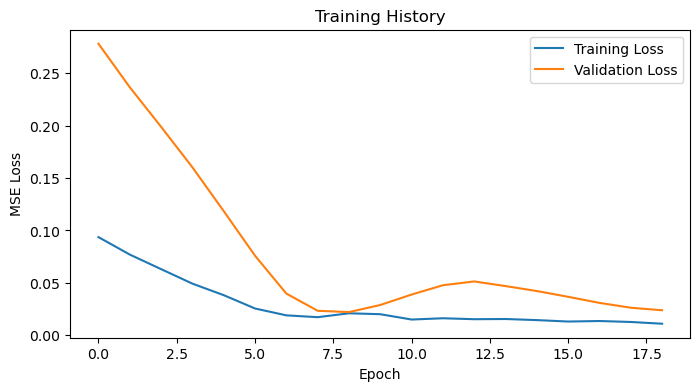

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


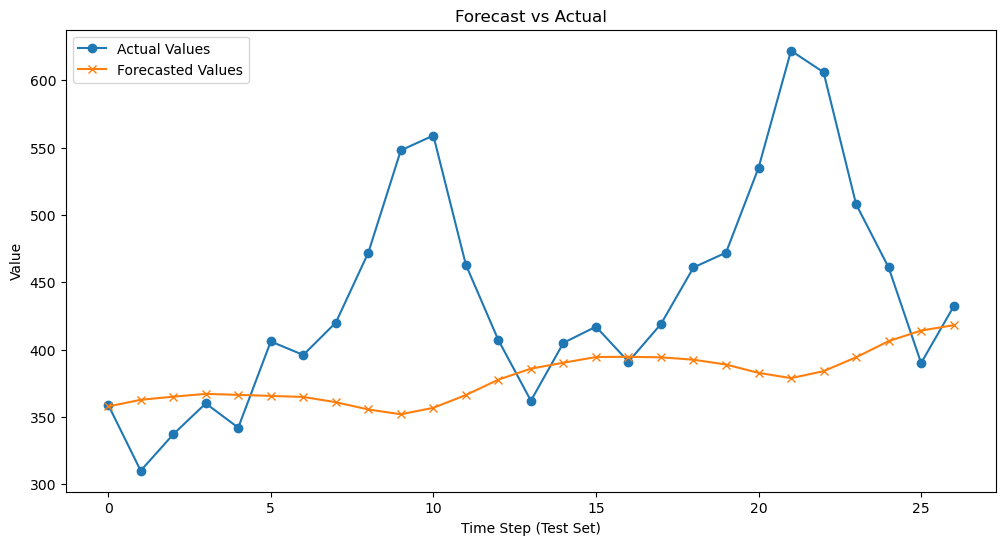

Actual Values (first 10): [359. 310. 337. 360. 342. 406. 396. 420. 472. 548.]
Forecasted Values (first 10): [357.7208  362.69366 365.0091  367.08798 366.35297 365.58347 364.8033
 360.8923  355.48798 351.93826]
[[357.7208 ]
 [362.69366]
 [365.0091 ]
 [367.08798]
 [366.35297]
 [365.58347]
 [364.8033 ]
 [360.8923 ]
 [355.48798]
 [351.93826]
 [356.73514]
 [366.23233]
 [377.64447]
 [385.8232 ]
 [390.23123]
 [394.45468]
 [394.61887]
 [394.24222]
 [392.466  ]
 [388.87845]
 [382.6969 ]
 [378.7856 ]
 [383.93152]
 [394.24707]
 [406.25754]
 [414.12265]
 [418.11105]]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# 1. Data Preparation
# ---------------------------
# Create a sample time series as a pandas Series.
# Replace this with your actual time series data if available.
ts1 = pd.Series([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.,
                 104., 118., 115., 126., 141., 135., 125., 149., 170., 170.,
                 158., 133., 114., 140., 145., 150., 178., 163., 172., 178.,
                 199., 199., 184., 162., 146., 166., 171., 180., 193., 181.,
                 183., 218., 230., 242., 209., 191., 172., 194., 196., 196.,
                 236., 235., 229., 243., 264., 272., 237., 211., 180., 201.,
                 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
                 203., 229., 242., 233., 267., 269., 270., 315., 364., 347.,
                 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
                 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
                 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
                 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
                 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
                 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
                 508., 461., 390., 432.])

# Drop any missing values (if present)
ts1_clean = ts1.dropna()

# Convert the Series to a 2D array (n_samples, 1) required for scaling
ts1_reshaped = ts1_clean.values.reshape(-1, 1)
print("Shape of ts1_reshaped:", ts1_reshaped.shape)

# ---------------------------
# 2. Scaling the Data
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(ts1_reshaped)

# Plot the scaled data
plt.figure(figsize=(10, 4))
plt.plot(data_scaled, label='Scaled Time Series')
plt.title('Scaled Time Series Data')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

# ---------------------------
# 3. Creating Sequences for Forecasting
# ---------------------------
def create_sequences(data, window_size):
    """
    Create sequences for supervised learning.
    Each sample consists of 'window_size' consecutive values as input,
    and the following value as the target.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define the window size (this is a hyperparameter you can tune)
WINDOW_SIZE = 10

# Create sequences
X, y = create_sequences(data_scaled, WINDOW_SIZE)

# Ensure X is 3D: (samples, timesteps, features)
if X.ndim == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# ---------------------------
# 4. Splitting Data into Training and Testing Sets
# ---------------------------
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Training set X:", X_train.shape, "y:", y_train.shape)
print("Testing set X:", X_test.shape, "y:", y_test.shape)

# ---------------------------
# 5. Building and Training the LSTM Model
# ---------------------------
model = Sequential()
# First LSTM layer; set return_sequences=True for stacking
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(WINDOW_SIZE, 1)))
model.add(Dropout(0.2))
# Second LSTM layer (no return_sequences needed at the end)
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
# Dense layer for output
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Callbacks: Early stopping and reducing learning rate on plateau
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model. Adjust epochs and batch_size as needed.
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_split=0.1, verbose=1, 
                    callbacks=[early_stop, reduce_lr])

# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# ---------------------------
# 6. Forecasting on Test Data
# ---------------------------
y_pred = model.predict(X_test)

# Inverse transform predictions and actual values to original scale.
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# ---------------------------
# 7. Plotting the Forecast vs. Actual Values
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Values', marker='o')
plt.plot(y_pred_inv, label='Forecasted Values', marker='x')
plt.title('Forecast vs Actual')
plt.xlabel('Time Step (Test Set)')
plt.ylabel('Value')
plt.legend()
plt.show()

# Optionally, print some of the actual and forecasted values for comparison.
print("Actual Values (first 10):", y_test_inv[:10].flatten())
print("Forecasted Values (first 10):", y_pred_inv[:10].flatten())
print(y_pred_inv)

In [6]:
actual = np.array(y_test_inv, dtype=float)
forecast = np.array(y_pred_inv, dtype=float)

APE = []  # List to store the Absolute Percentage Errors

# Calculate the APE for each day
for day in range(len(actual)):
    if actual[day] == 0:
        per_err = 0  # Avoid division by zero
    else:
        per_err = (actual[day] - forecast[day]) / actual[day]
        per_err = abs(per_err)  # Take the absolute value
    APE.append(per_err)
  
# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.array(APE).mean()  # This produces a NumPy scalar

# Convert MAPE to a Python float for proper rounding
MAPE = float(MAPE)

print(f'''MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } % 
''')

MAPE   : 0.15
MAPE % : 14.6 % 



In [7]:
len(ts1)
train=ts1[:134]
test=ts1[134:]


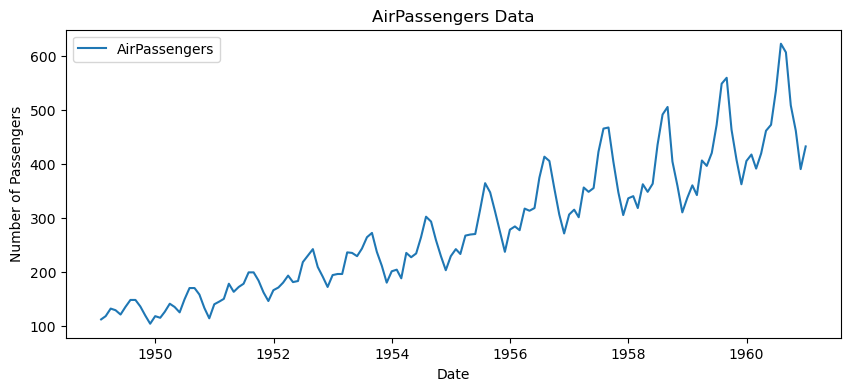

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  134
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -454.916
Date:                            Tue, 18 Feb 2025   AIC                            915.832
Time:                                    15:13:52   BIC                            924.219
Sample:                                         0   HQIC                           919.238
                                            - 134                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2207      0.082     -2.677      0.007      -0.382      -0.059
ma.S.L12      -0.0936      0.087   

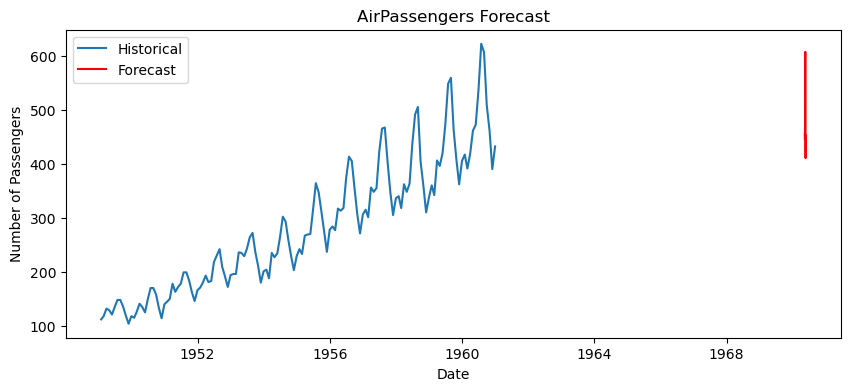

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create the time series data (AirPassengers dataset)
ts1 = pd.Series([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.,
                 104., 118., 115., 126., 141., 135., 125., 149., 170., 170.,
                 158., 133., 114., 140., 145., 150., 178., 163., 172., 178.,
                 199., 199., 184., 162., 146., 166., 171., 180., 193., 181.,
                 183., 218., 230., 242., 209., 191., 172., 194., 196., 196.,
                 236., 235., 229., 243., 264., 272., 237., 211., 180., 201.,
                 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
                 203., 229., 242., 233., 267., 269., 270., 315., 364., 347.,
                 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
                 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
                 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
                 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
                 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
                 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
                 508., 461., 390., 432.])

# Set the index to a datetime index (assuming monthly data starting at January 1949)
ts1.index = pd.date_range(start='1949-01-01	', periods=len(ts1), freq='M')

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(ts1, label='AirPassengers')
plt.title('AirPassengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Fit a SARIMA model. 
# The following parameters are a common starting point for this dataset:
#   order=(0,1,1): non-seasonal part
#   seasonal_order=(0,1,1,12): seasonal part with a period of 12 months.
model = sm.tsa.statespace.SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,1,12))
results = model.fit(disp=False)
print(results.summary())
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)
print("\nForecast using forecast(steps=10):")
print(forecast)


# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(ts1, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('AirPassengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [20]:
print(len(test))
print(len(forecast))
print(test)
print(train)
forecast

10
10
134    419.0
135    461.0
136    472.0
137    535.0
138    622.0
139    606.0
140    508.0
141    461.0
142    390.0
143    432.0
dtype: float64
0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
129    407.0
130    362.0
131    405.0
132    417.0
133    391.0
Length: 134, dtype: float64


134    455.191556
135    444.873346
136    467.958760
137    521.777304
138    595.788410
139    606.955265
140    510.832044
141    455.764137
142    410.456682
143    451.997488
Name: predicted_mean, dtype: float64

In [22]:
actual = np.array(test, dtype=float)
forecast = np.array(forecast, dtype=float)

APE = []  # List to store the Absolute Percentage Errors

# Calculate the APE for each day
for day in range(len(actual)):
    if actual[day] == 0:
        per_err = 0  # Avoid division by zero
    else:
        per_err = (actual[day] - forecast[day]) / actual[day]
        per_err = abs(per_err)  # Take the absolute value
    APE.append(per_err)
  
# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.array(APE).mean()  # This produces a NumPy scalar

# Convert MAPE to a Python float for proper rounding
MAPE = float(MAPE)

print(f'''MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } % 
''')

MAPE   : 0.03
MAPE % : 3.14 % 



                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                  134
Model:             ExponentialSmoothing   SSE                          12603.197
Optimized:                         True   AIC                            640.878
Trend:                         Additive   BIC                            687.243
Seasonal:                Multiplicative   AICC                           646.826
Seasonal Periods:                    12   Date:                 Tue, 18 Feb 2025
Box-Cox:                          False   Time:                         15:16:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3739412                alpha                 True
smoothing_trend          

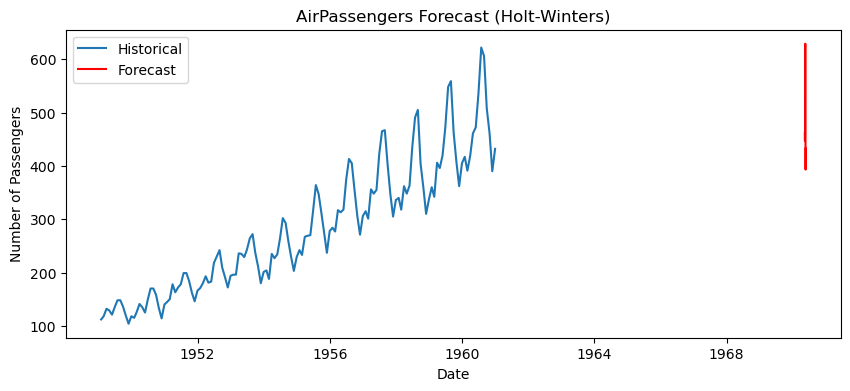

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Use the same AirPassengers dataset as before.
ts1.index = pd.date_range(start='1949-01', periods=len(ts1), freq='M')

# Fit Holt-Winters model with additive trend and multiplicative seasonality.
hw_model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12)
hw_fit = hw_model.fit(optimized=True)
print(hw_fit.summary())

# Forecast the next 12 months
hw_forecast = hw_fit.forecast(10)

# Plot the forecast
plt.figure(figsize=(10, 4))
plt.plot(ts1, label='Historical')
plt.plot(hw_forecast, label='Forecast', color='red')
plt.title('AirPassengers Forecast (Holt-Winters)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [26]:
actual = np.array(test, dtype=float)
forecast = np.array(hw_forecast, dtype=float)

APE = []  # List to store the Absolute Percentage Errors

# Calculate the APE for each day
for day in range(len(actual)):
    if actual[day] == 0:
        per_err = 0  # Avoid division by zero
    else:
        per_err = (actual[day] - forecast[day]) / actual[day]
        per_err = abs(per_err)  # Take the absolute value
    APE.append(per_err)
  
# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.array(APE).mean()  # This produces a NumPy scalar

# Convert MAPE to a Python float for proper rounding
MAPE = float(MAPE)

print(f'''MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } % 
''')

MAPE   : 0.02
MAPE % : 2.26 % 



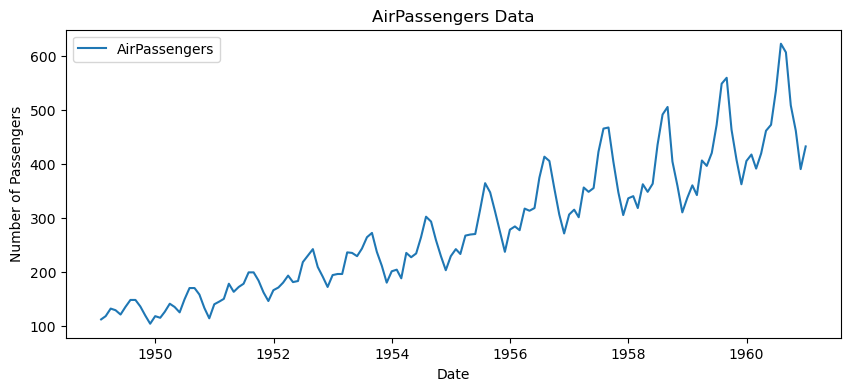

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=3.66 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=919.841, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=914.982, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=915.832, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=914.468, Time=0.06 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=915.311, Time=0.36 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.66 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=916.133, Time=0.10 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=915.810, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=915.082, Time=0.12 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=917.806, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=916.211, Time=0.17 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 7.209 seconds
                                     SARIMAX Results                                      
Dep.

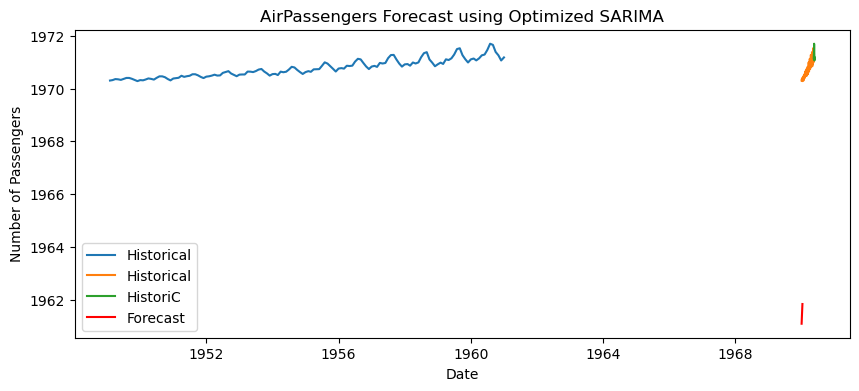

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create the time series data (AirPassengers data)
ts1 = pd.Series([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.,
                 104., 118., 115., 126., 141., 135., 125., 149., 170., 170.,
                 158., 133., 114., 140., 145., 150., 178., 163., 172., 178.,
                 199., 199., 184., 162., 146., 166., 171., 180., 193., 181.,
                 183., 218., 230., 242., 209., 191., 172., 194., 196., 196.,
                 236., 235., 229., 243., 264., 272., 237., 211., 180., 201.,
                 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
                 203., 229., 242., 233., 267., 269., 270., 315., 364., 347.,
                 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
                 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
                 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
                 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
                 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
                 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
                 508., 461., 390., 432.])

# Set datetime index (assume monthly data starting at January 1949)
ts1.index = pd.date_range(start='1949-01', periods=len(ts1), freq='M')

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(ts1, label='AirPassengers')
plt.title('AirPassengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

# Use auto_arima to find the best SARIMA model automatically.
# m=12 indicates monthly seasonality.
model_auto = pm.auto_arima(train, seasonal=True, m=12, trace=True,
                           error_action='ignore', suppress_warnings=True)
print(model_auto.summary())

# Forecast the next 12 months
n_periods = 10
forecast = model_auto.predict(n_periods=n_periods)

# Create a forecast index
forecast_index = pd.date_range(ts1.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='M')

# Convert forecast to a Series for plotting
forecast_series = pd.Series(forecast, index=forecast_index)

# Plot the historical data and forecast
plt.figure(figsize=(10, 4))
plt.plot(ts1, label='Historical')
plt.plot(train, label='Historical')
plt.plot(test, label='HistoriC')
plt.plot(forecast_index, label='Forecast', color='red')
plt.title('AirPassengers Forecast using Optimized SARIMA')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [31]:
print(forecast_series)
print(forecast_index)

1961-01-31   NaN
1961-02-28   NaN
1961-03-31   NaN
1961-04-30   NaN
1961-05-31   NaN
1961-06-30   NaN
1961-07-31   NaN
1961-08-31   NaN
1961-09-30   NaN
1961-10-31   NaN
Freq: M, dtype: float64
DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31'],
              dtype='datetime64[ns]', freq='M')


In [30]:
actual = np.array(test, dtype=float)
forecast = np.array(forecast_index, dtype=float)

APE = []  # List to store the Absolute Percentage Errors

# Calculate the APE for each day
for day in range(len(actual)):
    if actual[day] == 0:
        per_err = 0  # Avoid division by zero
    else:
        per_err = (actual[day] - forecast[day]) / actual[day]
        per_err = abs(per_err)  # Take the absolute value
    APE.append(per_err)
  
# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.array(APE).mean()  # This produces a NumPy scalar

# Convert MAPE to a Python float for proper rounding
MAPE = float(MAPE)

print(f'''MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } % 
''')

MAPE   : 561111831610669.6
MAPE % : 5.611118316106696e+16 % 



                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                  144
Model:             ExponentialSmoothing   SSE                          15952.882
Optimized:                         True   AIC                            709.892
Trend:                         Additive   BIC                            757.409
Seasonal:                Multiplicative   AICC                           715.364
Seasonal Periods:                    12   Date:                 Tue, 18 Feb 2025
Box-Cox:                          False   Time:                         15:29:29
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3185764                alpha                 True
smoothing_trend          

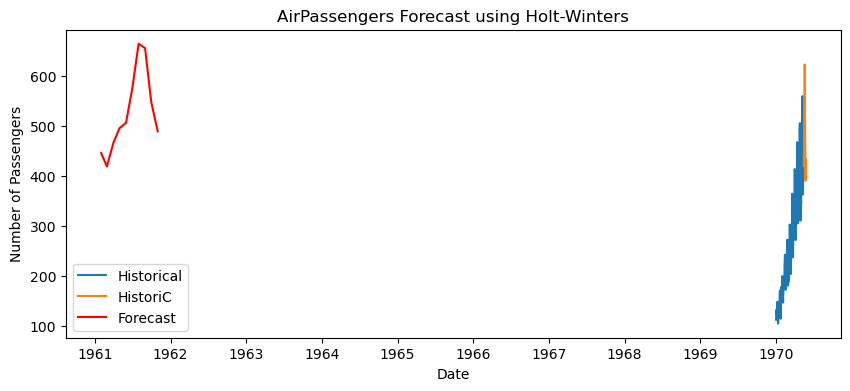

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Re-use the same AirPassengers data with datetime index
ts1 = pd.Series([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.,
                 104., 118., 115., 126., 141., 135., 125., 149., 170., 170.,
                 158., 133., 114., 140., 145., 150., 178., 163., 172., 178.,
                 199., 199., 184., 162., 146., 166., 171., 180., 193., 181.,
                 183., 218., 230., 242., 209., 191., 172., 194., 196., 196.,
                 236., 235., 229., 243., 264., 272., 237., 211., 180., 201.,
                 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
                 203., 229., 242., 233., 267., 269., 270., 315., 364., 347.,
                 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
                 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
                 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
                 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
                 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
                 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
                 508., 461., 390., 432.])
ts1.index = pd.date_range(start='1949-01-01', periods=len(ts1), freq='M')

# Fit the Holt-Winters model.
# Here we use additive trend and multiplicative seasonality.
hw_model = ExponentialSmoothing(ts1, trend='add', seasonal='mul', seasonal_periods=12)
hw_fit = hw_model.fit(optimized=True)
print(hw_fit.summary())

# Forecast the next 12 months
hw_forecast = hw_fit.forecast(10)

# Plot the forecast along with the historical data
plt.figure(figsize=(10, 4))
plt.plot(train, label='Historical')
plt.plot(test, label='HistoriC')
plt.plot(hw_forecast, label='Forecast', color='red')
plt.title('AirPassengers Forecast using Holt-Winters')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [34]:
actual = np.array(test, dtype=float)
forecast = np.array(hw_forecast, dtype=float)

APE = []  # List to store the Absolute Percentage Errors

# Calculate the APE for each day
for day in range(len(actual)):
    if actual[day] == 0:
        per_err = 0  # Avoid division by zero
    else:
        per_err = (actual[day] - forecast[day]) / actual[day]
        per_err = abs(per_err)  # Take the absolute value
    APE.append(per_err)
  
# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.array(APE).mean()  # This produces a NumPy scalar

# Convert MAPE to a Python float for proper rounding
MAPE = float(MAPE)

print(f'''MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } % 
''')

MAPE   : 0.17
MAPE % : 17.45 % 



Shape of ts1_reshaped: (144, 1)


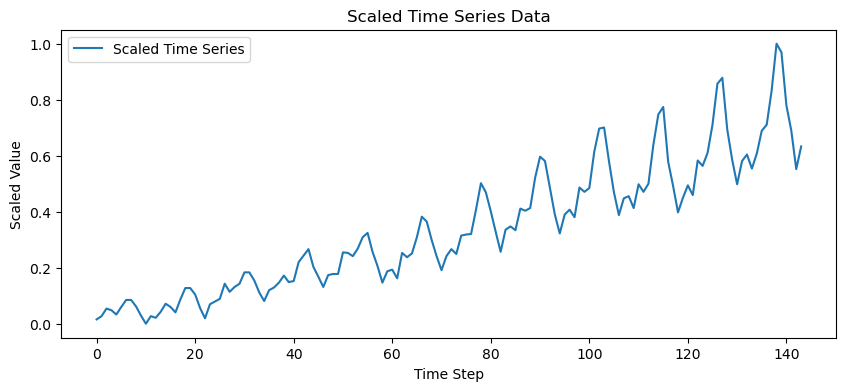

Shape of X before reshape: (134, 10, 1)
Shape of y: (134, 1)
Shape of X after reshape: (134, 10, 1)
Training set X: (120, 10, 1) y: (120, 1)
Testing set X: (14, 10, 1) y: (14, 1)


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - loss: 0.1313 - val_loss: 0.4161
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.1138 - val_loss: 0.3738
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1001 - val_loss: 0.3325
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0833 - val_loss: 0.2922
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0788 - val_loss: 0.2503
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0621 - val_loss: 0.2066
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0466 - val_loss: 0.1592
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0353 - val_loss: 0.1082
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0216 - val_loss: 0.0622
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0168 - val_loss: 0.0357
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 0.0138 - val_loss: 0.0312
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0118 - val_loss: 0.036

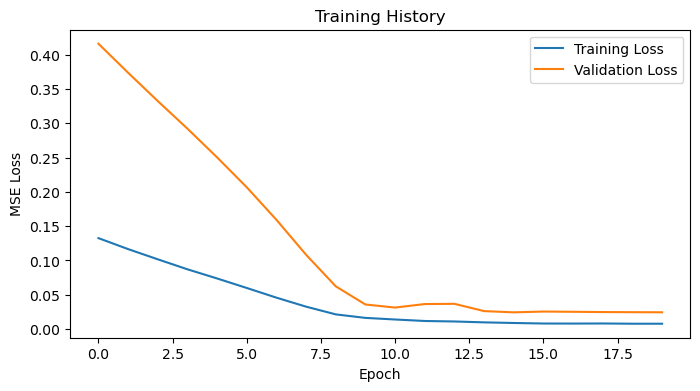

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step


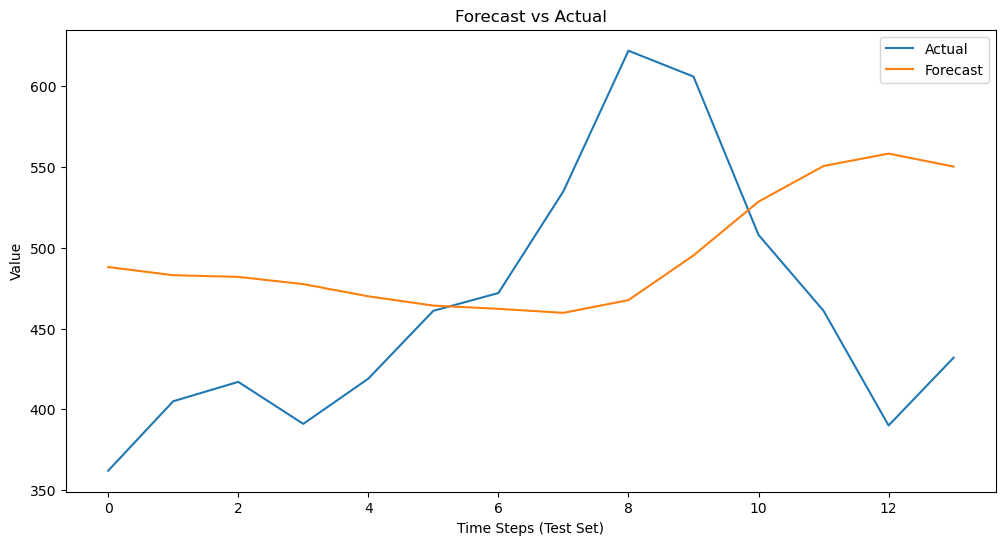

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# 1. Data Preparation
# ---------------------------

# Create a sample pandas Series with time series data.
# You can replace this with your actual data.
ts1 = pd.Series([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.,
                 104., 118., 115., 126., 141., 135., 125., 149., 170., 170.,
                 158., 133., 114., 140., 145., 150., 178., 163., 172., 178.,
                 199., 199., 184., 162., 146., 166., 171., 180., 193., 181.,
                 183., 218., 230., 242., 209., 191., 172., 194., 196., 196.,
                 236., 235., 229., 243., 264., 272., 237., 211., 180., 201.,
                 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
                 203., 229., 242., 233., 267., 269., 270., 315., 364., 347.,
                 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
                 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
                 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
                 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
                 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
                 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
                 508., 461., 390., 432.])

# Drop any missing values (if present)
ts1_clean = ts1.dropna()

# Convert the Series into a 2D array (n_samples, 1) required by scikit-learn
ts1_reshaped = ts1_clean.values.reshape(-1, 1)
print("Shape of ts1_reshaped:", ts1_reshaped.shape)

# ---------------------------
# 2. Scaling the Data
# ---------------------------

# Scale the data to the range (0, 1) using MinMaxScaler.
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(ts1_reshaped)

# Plot the scaled data
plt.figure(figsize=(10, 4))
plt.plot(data_scaled, label='Scaled Time Series')
plt.title('Scaled Time Series Data')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

# ---------------------------
# 3. Creating Sequences for Forecasting
# ---------------------------

def create_sequences(data, window_size):
    """
    Create sequences of data for supervised learning.
    Each sample consists of 'window_size' consecutive values as input and
    the next value as the target.
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define the window size (number of past time steps to use as input)
WINDOW_SIZE = 10

# Create sequences from the scaled data.
X, y = create_sequences(data_scaled, WINDOW_SIZE)

# Check shapes:
# X should be (num_samples, WINDOW_SIZE, 1) and y should be (num_samples, 1)
print("Shape of X before reshape:", X.shape)
print("Shape of y:", y.shape)

# For LSTM, we need to ensure X is 3D: (samples, timesteps, features)
# In our case, features = 1, so if X is not already 3D, reshape it:
if X.ndim == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))
print("Shape of X after reshape:", X.shape)

# ---------------------------
# 4. Splitting Data into Training and Testing Sets
# ---------------------------

# Use 80% of the data for training and 20% for testing.
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Training set X:", X_train.shape, "y:", y_train.shape)
print("Testing set X:", X_test.shape, "y:", y_test.shape)

# ---------------------------
# 5. Building and Training the LSTM Model
# ---------------------------

model = Sequential()
# Add an LSTM layer with 50 units. The input_shape should match (WINDOW_SIZE, 1)
model.add(LSTM(50, activation='relu', input_shape=(WINDOW_SIZE, 1)))
# Add a Dense output layer (predicts one value)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model.
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# ---------------------------
# 6. Forecasting on Test Data
# ---------------------------

# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform predictions and true values back to the original scale.
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# ---------------------------
# 7. Plotting the Forecast vs. Actual Values
# ---------------------------

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Forecast')
plt.title('Forecast vs Actual')
plt.xlabel('Time Steps (Test Set)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [45]:
actual = np.array(y_test_inv, dtype=float)
forecast = np.array(y_pred_inv, dtype=float)

APE = []  # List to store the Absolute Percentage Errors

# Calculate the APE for each day
for day in range(len(actual)):
    if actual[day] == 0:
        per_err = 0  # Avoid division by zero
    else:
        per_err = (actual[day] - forecast[day]) / actual[day]
        per_err = abs(per_err)  # Take the absolute value
    APE.append(per_err)
  
# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.array(APE).mean()  # This produces a NumPy scalar

# Convert MAPE to a Python float for proper rounding
MAPE = float(MAPE)

print(f'''MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } % 
''')

MAPE   : 0.18
MAPE % : 18.42 % 



Shape of ts1_reshaped: (144, 1)


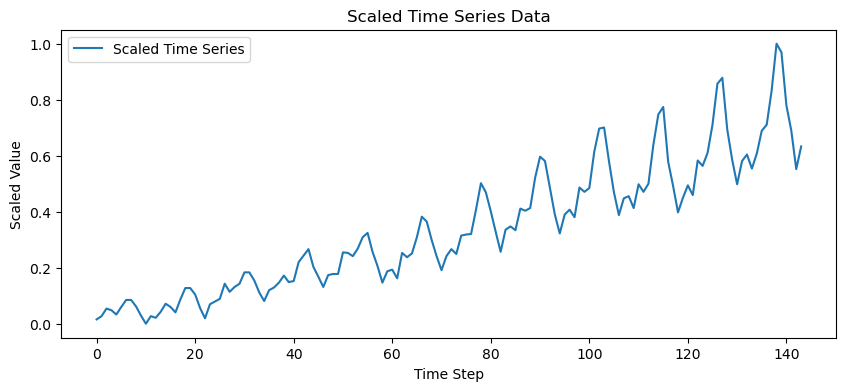

Shape of X after reshape: (134, 10, 1)
Shape of y: (134, 1)
Training set X: (120, 10, 1) y: (120, 1)
Testing set X: (14, 10, 1) y: (14, 1)


C:\Users\SCIENCE\Desktop\anaco\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 410ms/step - loss: 0.1151 - val_loss: 0.2965 - learning_rate: 0.0010
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0822 - val_loss: 0.2218 - learning_rate: 0.0010
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0620 - val_loss: 0.1428 - learning_rate: 0.0010
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0335 - val_loss: 0.0676 - learning_rate: 0.0010
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.0174 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0205 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0193 - val_loss: 0.0317 - learning_rate: 0.0010
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0131 - val_loss: 0.0478 - learning_rate: 0.0010
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0130 - val_loss: 0.0544 - learning_rate: 0.0010
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━

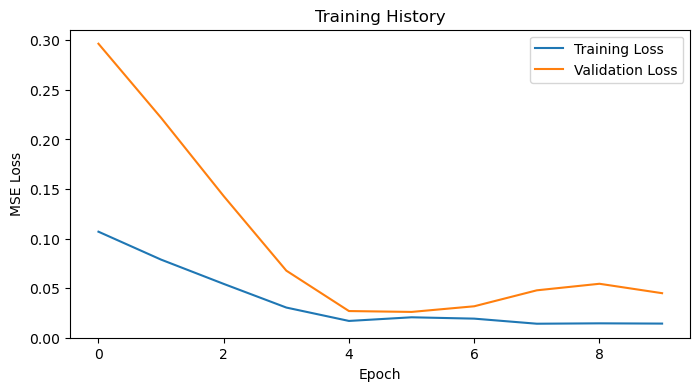

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step


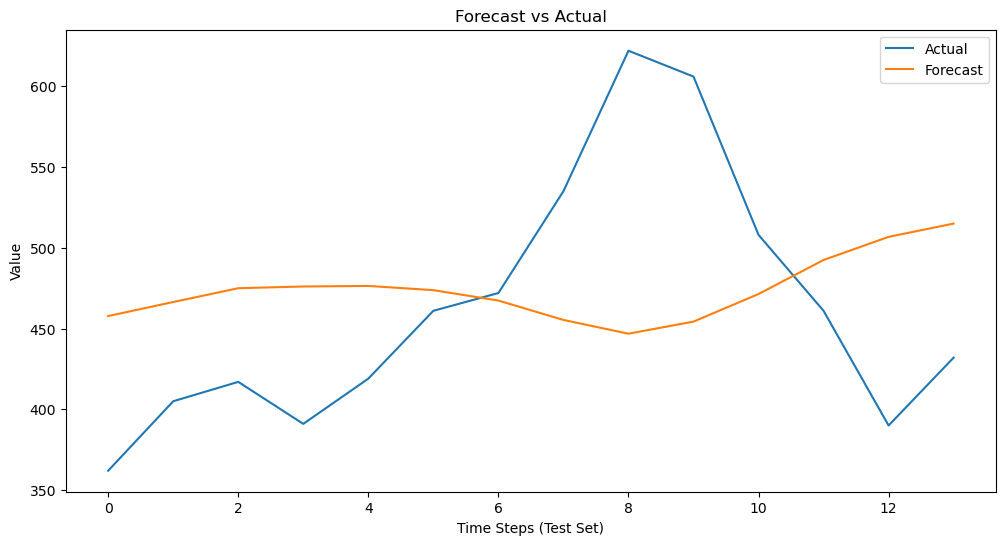

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler

# ---------------------------
# 1. Data Preparation
# ---------------------------
# Create a sample pandas Series with time series data.
# Replace this with your actual data if needed.
ts1 = pd.Series([112., 118., 132., 129., 121., 135., 148., 148., 136., 119.,
                 104., 118., 115., 126., 141., 135., 125., 149., 170., 170.,
                 158., 133., 114., 140., 145., 150., 178., 163., 172., 178.,
                 199., 199., 184., 162., 146., 166., 171., 180., 193., 181.,
                 183., 218., 230., 242., 209., 191., 172., 194., 196., 196.,
                 236., 235., 229., 243., 264., 272., 237., 211., 180., 201.,
                 204., 188., 235., 227., 234., 264., 302., 293., 259., 229.,
                 203., 229., 242., 233., 267., 269., 270., 315., 364., 347.,
                 312., 274., 237., 278., 284., 277., 317., 313., 318., 374.,
                 413., 405., 355., 306., 271., 306., 315., 301., 356., 348.,
                 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
                 362., 348., 363., 435., 491., 505., 404., 359., 310., 337.,
                 360., 342., 406., 396., 420., 472., 548., 559., 463., 407.,
                 362., 405., 417., 391., 419., 461., 472., 535., 622., 606.,
                 508., 461., 390., 432.])

# Drop any missing values (if present)
ts1_clean = ts1.dropna()

# Convert the Series into a 2D array (n_samples, 1)
ts1_reshaped = ts1_clean.values.reshape(-1, 1)
print("Shape of ts1_reshaped:", ts1_reshaped.shape)

# ---------------------------
# 2. Scaling the Data
# ---------------------------
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(ts1_reshaped)

# Plot the scaled data
plt.figure(figsize=(10, 4))
plt.plot(data_scaled, label='Scaled Time Series')
plt.title('Scaled Time Series Data')
plt.xlabel('Time Step')
plt.ylabel('Scaled Value')
plt.legend()
plt.show()

# ---------------------------
# 3. Creating Sequences for Forecasting
# ---------------------------
def create_sequences(data, window_size):
    """
    Create sequences for supervised learning.
    Each sample consists of 'window_size' consecutive values (input)
    and the next value (target).
    """
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Define the window size (tune this parameter based on your data)
WINDOW_SIZE = 10

# Create sequences from the scaled data.
X, y = create_sequences(data_scaled, WINDOW_SIZE)

# Ensure X has shape (samples, timesteps, features)
if X.ndim == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))
print("Shape of X after reshape:", X.shape)
print("Shape of y:", y.shape)

# ---------------------------
# 4. Splitting Data into Training and Testing Sets
# ---------------------------
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
print("Training set X:", X_train.shape, "y:", y_train.shape)
print("Testing set X:", X_test.shape, "y:", y_test.shape)

# ---------------------------
# 5. Building and Training the Improved LSTM Model
# ---------------------------
model = Sequential()
# First LSTM layer with Dropout, return sequences for stacking
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(WINDOW_SIZE, 1)))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
# Output layer
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model with more epochs; early stopping will halt if no improvement is seen.
history = model.fit(X_train, y_train, epochs=10, batch_size=32, 
                    validation_split=0.1, verbose=1,
                    callbacks=[early_stop, reduce_lr])

# Plot training history
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# ---------------------------
# 6. Forecasting on Test Data
# ---------------------------
y_pred = model.predict(X_test)

# Inverse transform predictions and true values to original scale.
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# ---------------------------
# 7. Plotting the Forecast vs. Actual Values
# ---------------------------
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Forecast')
plt.title('Forecast vs Actual')
plt.xlabel('Time Steps (Test Set)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [48]:
actual = np.array(test, dtype=float)
forecast = np.array(forecast, dtype=float)

APE = []  # List to store the Absolute Percentage Errors

# Calculate the APE for each day
for day in range(len(actual)):
    if actual[day] == 0:
        per_err = 0  # Avoid division by zero
    else:
        per_err = (actual[day] - forecast[day]) / actual[day]
        per_err = abs(per_err)  # Take the absolute value
    APE.append(per_err)
  
# Calculate the Mean Absolute Percentage Error (MAPE)
MAPE = np.array(APE).mean()  # This produces a NumPy scalar

# Convert MAPE to a Python float for proper rounding
MAPE = float(MAPE)

print(f'''MAPE   : { round(MAPE, 2) }
MAPE % : { round(MAPE*100, 2) } % 
''')

MAPE   : 0.13
MAPE % : 12.58 % 

